# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [ ]:
# imports
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Lectura
from google.colab import drive
import pandas as pd

drive.mount('/gdrive')

ruta = "/gdrive/My Drive/ejercicios_ml/clasificacion/dataset_banco_clean.csv"
data = pd.read_csv(ruta)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

Análisis de cada variable de manera individual:


Empezaremos por las Variables numéricas:

1. Edad (age):

Estadísticas descriptivas: Media, mediana, desviación estándar, mínimo, máximo.

Histograma: Para visualizar la distribución de las edades.



Estadísticas descriptivas para la variable 'age':
 count    45189.000000
mean        40.936445
std         10.618502
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


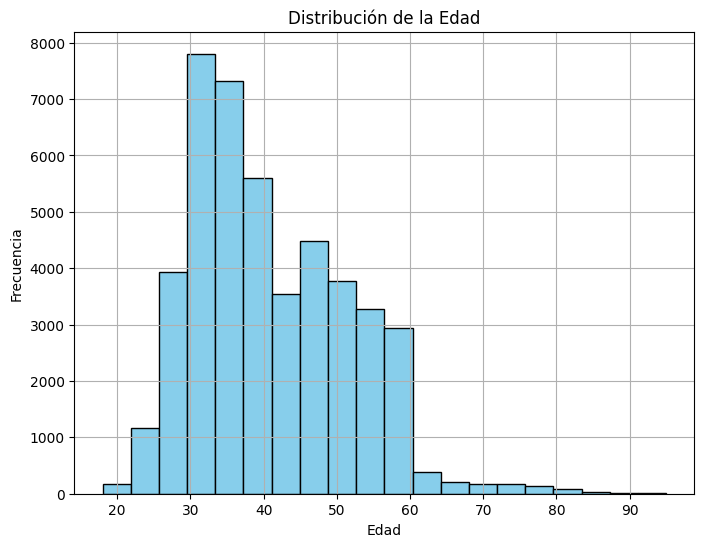

In [ ]:
# Estadísticas descriptivas para la variable "age"
age_stats = data['age'].describe()
print("Estadísticas descriptivas para la variable 'age':\n", age_stats)

# Visualización de la distribución de la variable "age" mediante un histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


La edad media de las personas en el conjunto de datos es de 40,9 años. La mediana, que es de 39 años, indica que la mitad de las personas son más jóvenes que 39 años y la otra mitad son mayores. La desviación estándar de 10,6 años indica que la edad está distribuida de manera relativamente uniforme alrededor de la media. El mínimo de 18 años indica que la persona más joven del conjunto de datos tiene 18 años. El máximo de 95 años indica que la persona más mayor del conjunto de datos tiene 95 años.

 Histograma

 El histograma muestra que la distribución de las edades es unimodal, con un pico en torno a la edad de 40 años. La distribución se inclina ligeramente hacia la derecha, lo que indica que hay más personas mayores que jóvenes.

2. Saldo (balance):

Estadísticas descriptivas: Media, mediana, desviación estándar, mínimo, máximo.

Boxplot: Para identificar la presencia de outliers.

Histograma: Para visualizar la distribución de los saldos.

Estadísticas descriptivas para la variable 'balance':
 count     45189.000000
mean       1374.012149
std        3924.370039
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64


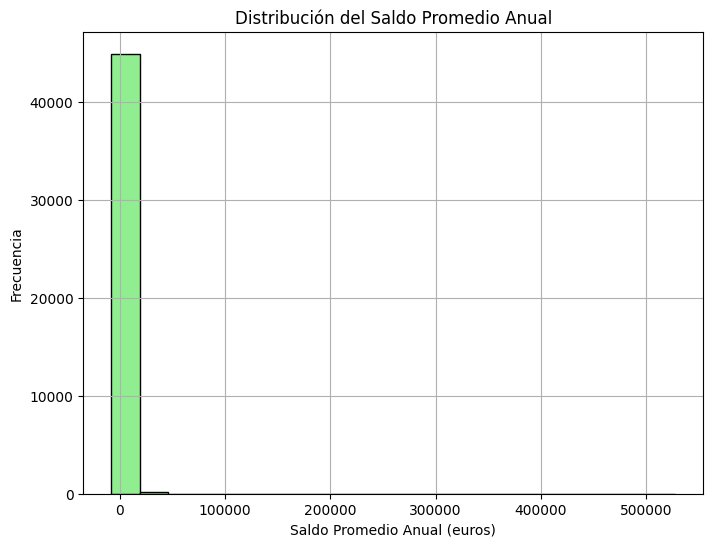

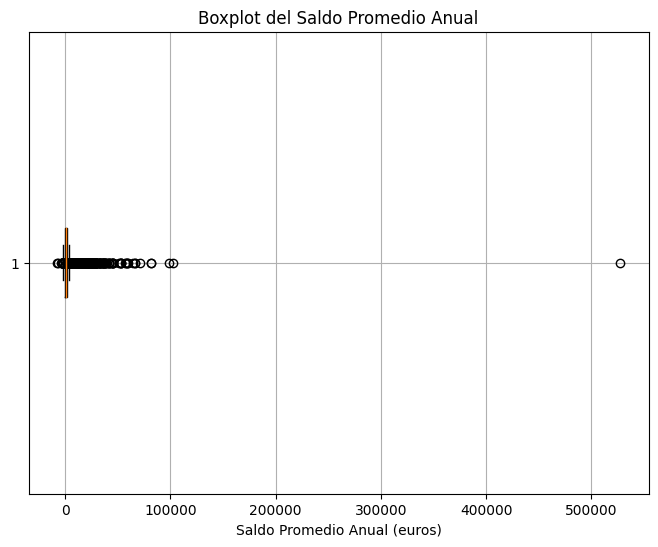

In [ ]:
# Estadísticas descriptivas para la variable "balance"
balance_stats = data['balance'].describe()
print("Estadísticas descriptivas para la variable 'balance':\n", balance_stats)

# Visualización de la distribución de la variable "balance" mediante un histograma
plt.figure(figsize=(8, 6))
plt.hist(data['balance'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución del Saldo Promedio Anual')
plt.xlabel('Saldo Promedio Anual (euros)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot para identificar la presencia de outliers en el saldo
plt.figure(figsize=(8, 6))
plt.boxplot(data['balance'], vert=False)
plt.title('Boxplot del Saldo Promedio Anual')
plt.xlabel('Saldo Promedio Anual (euros)')
plt.grid(True)
plt.show()


La media del saldo anual es de 1374,01 euros, lo que significa que, en promedio, las personas en el conjunto de datos ganan esta cantidad de dinero al año. La mediana, que es de 448 euros, indica que la mitad de las personas ganan más que 448 euros al año y la otra mitad gana menos. La desviación estándar de 3924,37 euros indica que el saldo está distribuido de manera muy desigual alrededor de la media. Hay muchas personas que ganan muy poco dinero y algunas personas que ganan mucho dinero. El mínimo de -8019 euros indica que hay personas que tienen deudas. El máximo de 527.532 euros indica que hay personas que ganan mucho dinero.

El boxplot muestra que la distribución del saldo está muy sesgada a la derecha. Esto significa que hay muchas más personas que ganan poco dinero que personas que ganan mucho dinero. El boxplot también muestra que hay algunos valores atípicos, que son puntos de datos que se encuentran muy lejos del resto de los datos.

Histograma:

El saldo anual de las personas en el conjunto de datos está distribuido de manera muy desigual. La mayoría de las personas ganan poco dinero, pero hay algunas personas que ganan mucho dinero. Hay algunos valores atípicos en el conjunto de datos, que podrían ser el resultado de errores de entrada de datos o de casos excepcionales.

3. Duración de la llamada (duration):

Estadísticas descriptivas: Media, mediana, desviación estándar, mínimo, máximo.

Boxplot: Para identificar la presencia de outliers.

Histograma: Para visualizar la distribución de las duraciones de llamadas.

Estadísticas descriptivas para la variable 'duration':
 count    45189.000000
mean       258.115006
std        257.349601
min          1.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


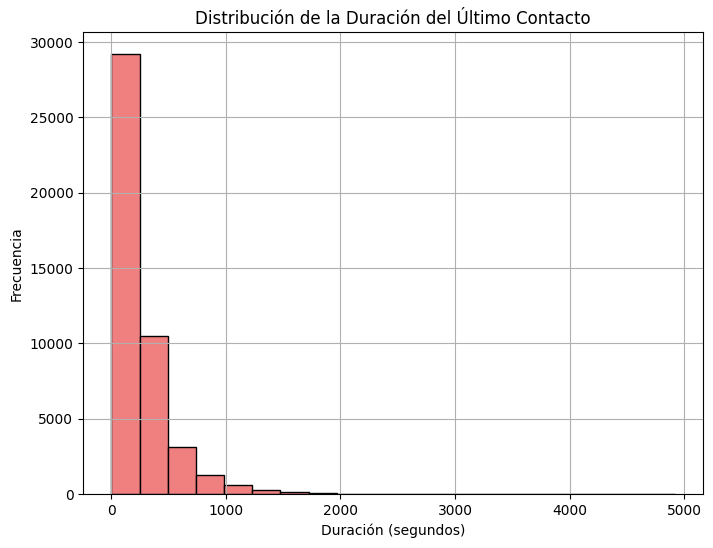

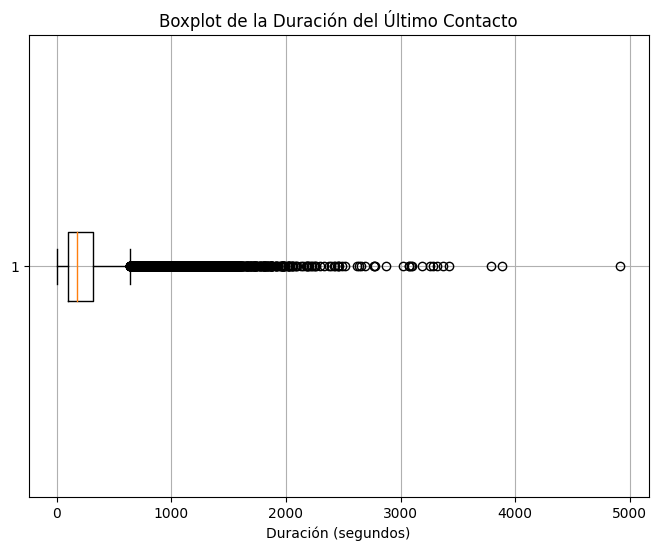

In [ ]:
# Estadísticas descriptivas para la variable "duration"
duration_stats = data['duration'].describe()
print("Estadísticas descriptivas para la variable 'duration':\n", duration_stats)

# Visualización de la distribución de la variable "duration" mediante un histograma
plt.figure(figsize=(8, 6))
plt.hist(data['duration'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribución de la Duración del Último Contacto')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot para identificar la presencia de outliers en la duración de las llamadas
plt.figure(figsize=(8, 6))
plt.boxplot(data['duration'], vert=False)
plt.title('Boxplot de la Duración del Último Contacto')
plt.xlabel('Duración (segundos)')
plt.grid(True)
plt.show()



La duración media de una llamada es de 258,12 segundos, lo que equivale a unos 4 minutos y 18 segundos. La mediana, que es de 180 segundos, indica que la mitad de las llamadas duran menos de 3 minutos y la otra mitad duran más. La desviación estándar de 257,35 segundos indica que la duración de las llamadas está distribuida de manera relativamente uniforme alrededor de la media. Hay muchas llamadas que duran alrededor de 4 minutos, pero también hay algunas llamadas que duran mucho más o mucho menos. El mínimo de 1 segundo indica que hay llamadas que duran menos de un segundo. El máximo de 4918 segundos indica que hay llamadas que duran más de 82 minutos.

Boxplot

El boxplot muestra que la distribución de la duración de las llamadas está ligeramente sesgada a la derecha. Esto significa que hay más llamadas cortas que llamadas largas. El boxplot también muestra que hay algunos valores atípicos, que son llamadas que duran mucho más que la mayoría de las llamadas.

Histograma

El histograma muestra que la distribución de la duración de las llamadas es unimodal, con un pico en torno a la duración de 4 minutos. La distribución se inclina ligeramente hacia la derecha, lo que indica que hay más llamadas cortas que llamadas largas.

4. Número de campañas (campaign):

Estadísticas descriptivas: Media, mediana, desviación estándar, mínimo, máximo.

Boxplot: Para identificar la presencia de outliers.

Histograma: Para visualizar la distribución del número de campañas.

Estadísticas descriptivas para la variable 'campaign':
 count    45189.000000
mean         2.763283
std          3.096579
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


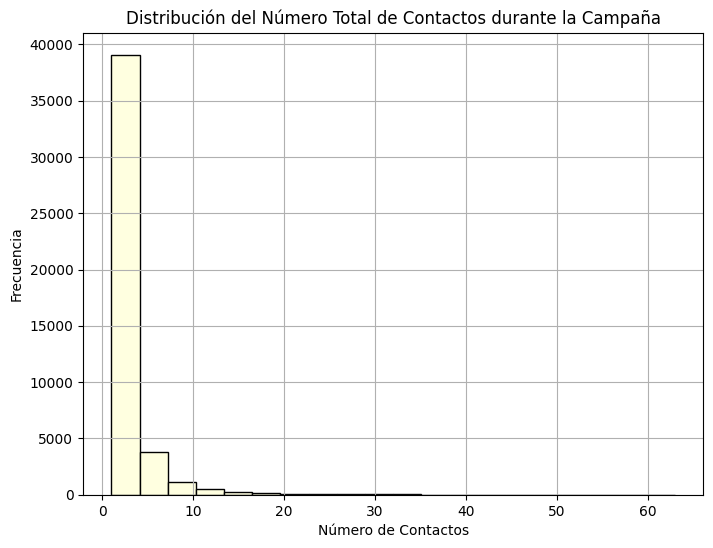

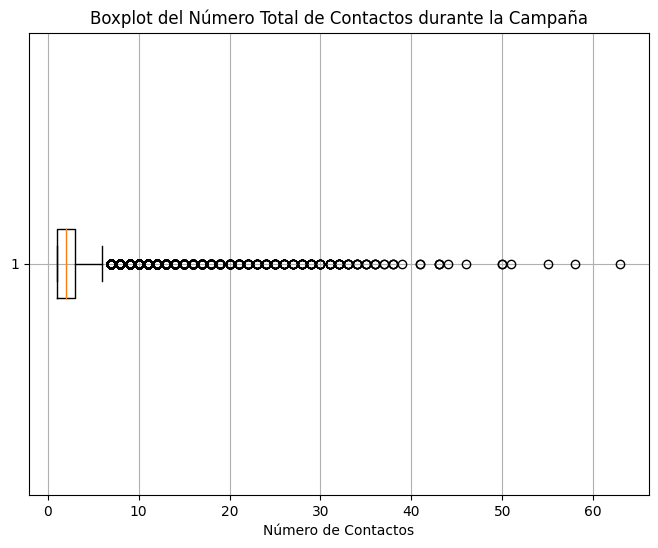

In [ ]:
# Estadísticas descriptivas para la variable "campaign"
campaign_stats = data['campaign'].describe()
print("Estadísticas descriptivas para la variable 'campaign':\n", campaign_stats)

# Visualización de la distribución de la variable "campaign" mediante un histograma
plt.figure(figsize=(8, 6))
plt.hist(data['campaign'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Distribución del Número Total de Contactos durante la Campaña')
plt.xlabel('Número de Contactos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot para identificar la presencia de outliers en el número de campañas
plt.figure(figsize=(8, 6))
plt.boxplot(data['campaign'], vert=False)
plt.title('Boxplot del Número Total de Contactos durante la Campaña')
plt.xlabel('Número de Contactos')
plt.grid(True)
plt.show()




El análisis de la variable "campaña" muestra que el número de campañas por cliente varía de 1 a 63. La media y la mediana del número de campañas por cliente son ambas de 2, lo que indica que la mayoría de los clientes participan en un número moderado de campañas. Hay una pequeña cantidad de valores atípicos en el número de campañas por cliente.

5. Días desde el último contacto (pdays):

Estadísticas descriptivas: Media, mediana, desviación estándar, mínimo, máximo.

Boxplot: Para identificar la presencia de outliers.

Histograma: Para visualizar la distribución de los días desde el último contacto.



Estadísticas descriptivas para la variable 'pdays':
 count    45189.000000
mean        40.178893
std        100.107295
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


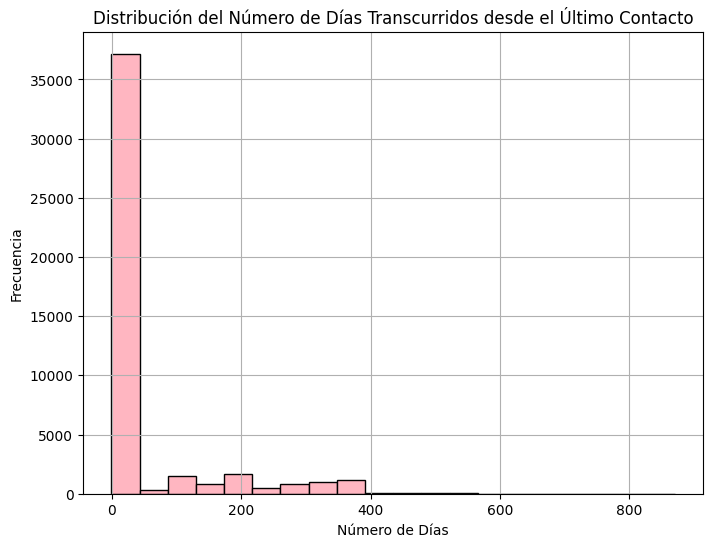

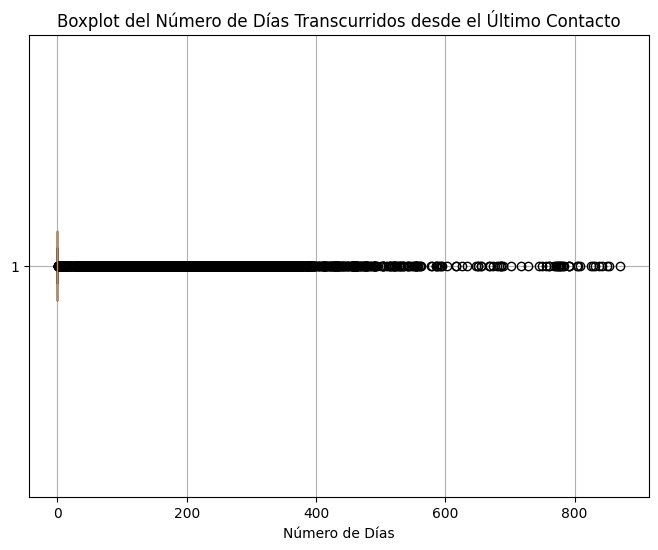

In [ ]:
# Estadísticas descriptivas para la variable "pdays"
pdays_stats = data['pdays'].describe()
print("Estadísticas descriptivas para la variable 'pdays':\n", pdays_stats)

# Visualización de la distribución de la variable "pdays" mediante un histograma
plt.figure(figsize=(8, 6))
plt.hist(data['pdays'], bins=20, color='lightpink', edgecolor='black')
plt.title('Distribución del Número de Días Transcurridos desde el Último Contacto')
plt.xlabel('Número de Días')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot para identificar la presencia de outliers en el número de días desde el último contacto
plt.figure(figsize=(8, 6))
plt.boxplot(data['pdays'], vert=False)
plt.title('Boxplot del Número de Días Transcurridos desde el Último Contacto')
plt.xlabel('Número de Días')
plt.grid(True)
plt.show()



El análisis de la variable "pdays" muestra que el número de días desde el último contacto varía de -1 a 871 días. La media y la mediana del número de días desde el último contacto son ambas de -1, lo que indica que la mayoría de los clientes han tenido un contacto reciente. Sin embargo, hay una gran cantidad de valores atípicos en el número de días desde el último contacto, lo que indica que hay un grupo considerable de clientes que no han tenido contacto en un periodo muy largo de tiempo.

6. Número de contactos previos (previous):

Estadísticas descriptivas: Media, mediana, desviación estándar, mínimo, máximo.

Boxplot: Para identificar la presencia de outliers.

Histograma: Para visualizar la distribución del número de contactos previos.

Estadísticas descriptivas para la variable 'previous':
 count    45189.000000
mean         0.574166
std          1.907950
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: previous, dtype: float64


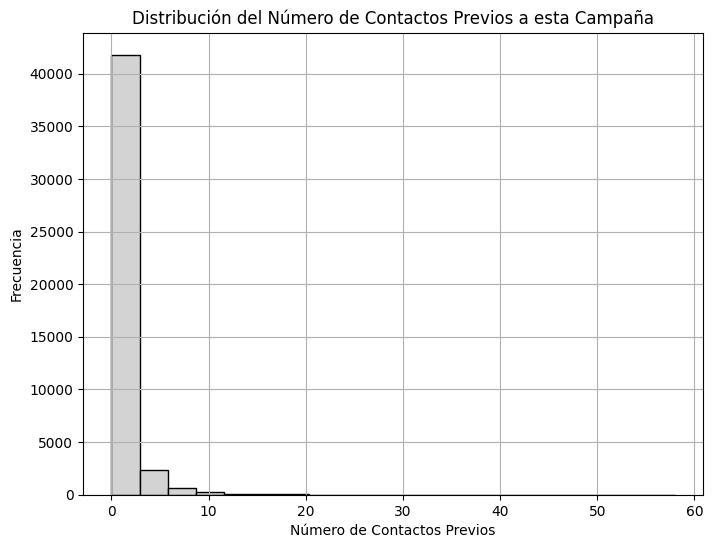

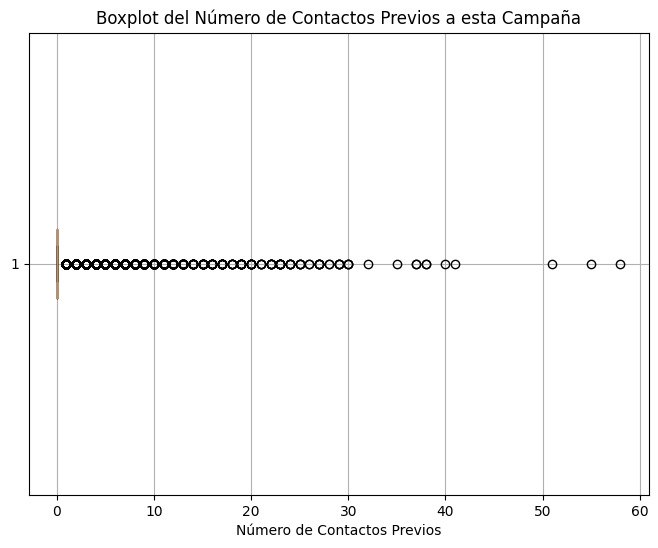

In [ ]:
# Estadísticas descriptivas para la variable "previous"
previous_stats = data['previous'].describe()
print("Estadísticas descriptivas para la variable 'previous':\n", previous_stats)

# Visualización de la distribución de la variable "previous" mediante un histograma
plt.figure(figsize=(8, 6))
plt.hist(data['previous'], bins=20, color='lightgrey', edgecolor='black')
plt.title('Distribución del Número de Contactos Previos a esta Campaña')
plt.xlabel('Número de Contactos Previos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot para identificar la presencia de outliers en el número de contactos previos
plt.figure(figsize=(8, 6))
plt.boxplot(data['previous'], vert=False)
plt.title('Boxplot del Número de Contactos Previos a esta Campaña')
plt.xlabel('Número de Contactos Previos')
plt.grid(True)
plt.show()


Ahora analizaremos las variables categoricas

1. Variable "job" (tipo de trabajo):

Calcularemos la frecuencia de cada categoría.

Visualizaremos estas frecuencias mediante un gráfico de barras.


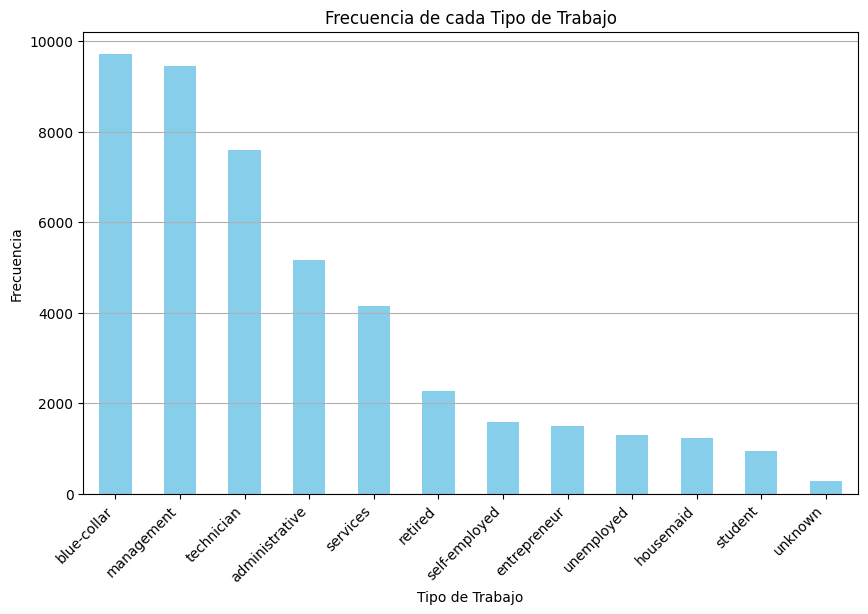

In [ ]:
# Frecuencia de cada categoría para la variable "job"
job_counts = data['job'].value_counts()

# Visualización de la frecuencia de cada categoría mediante un gráfico de barras
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de cada Tipo de Trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


El análisis de la frecuencia de cada tipo de trabajo muestra que hay una gran diversidad de tipos de trabajo entre los clientes. Sin embargo, los tipos de trabajo más comunes son "blue-collar", "management", "technician" y "administrative".

Los tipos de trabajo menos comunes son "unknown" (320), "housemaid" (845) y "student" (523). Estos tipos de trabajo representan el 2.8% del total de clientes.

2. Variable "marital" (estado civil):

---
Calcularemos la frecuencia de cada categoría.

Visualizaremos estas frecuencias mediante un gráfico de barras.

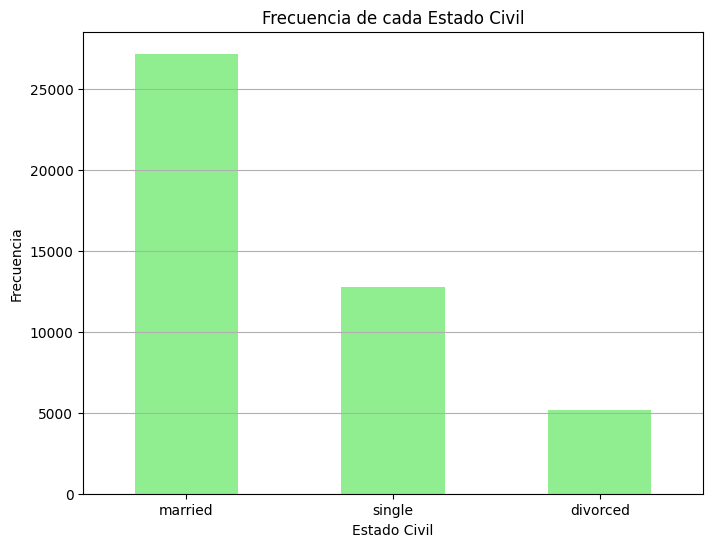

In [ ]:
# Frecuencia de cada categoría para la variable "marital"
marital_counts = data['marital'].value_counts()

# Visualización de la frecuencia de cada categoría mediante un gráfico de barras
plt.figure(figsize=(8, 6))
marital_counts.plot(kind='bar', color='lightgreen')
plt.title('Frecuencia de cada Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


El gráfico de barras muestra que el estado civil más común es "married" (26858), seguido de "single" (16228) y "divorced" (2103)

3.Variable "education" (nivel educativo):

Calcularemos la frecuencia de cada categoría.

Visualizaremos estas frecuencias mediante un gráfico de barras.

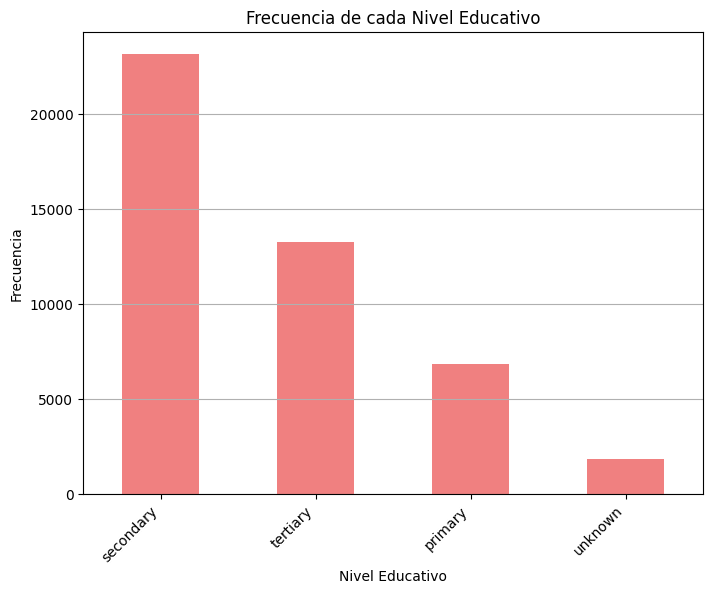

In [ ]:
# Frecuencia de cada categoría para la variable "education"
education_counts = data['education'].value_counts()

# Visualización de la frecuencia de cada categoría mediante un gráfico de barras
plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', color='lightcoral')
plt.title('Frecuencia de cada Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


El análisis de la frecuencia de cada nivel educativo muestra que la mayoría de los clientes tienen un nivel educativo alto. Hay un pequeño porcentaje de clientes con un nivel educativo desconocido o bajo.

4. Variable "default" (si dejó de pagar sus obligaciones):

Calcularemos la frecuencia de cada categoría.

Visualizaremos estas frecuencias mediante un gráfico de barras.

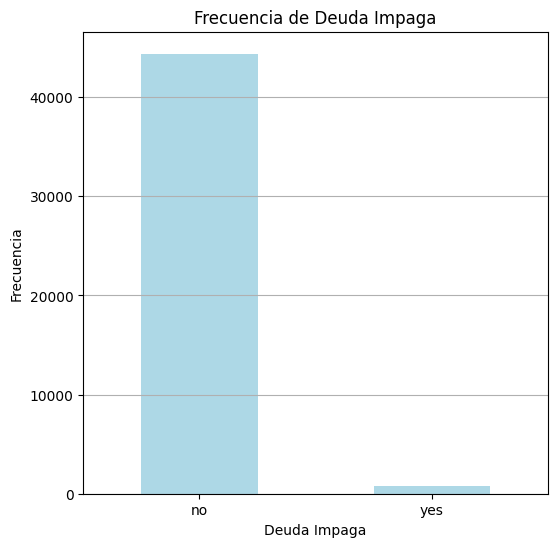

In [ ]:
# Frecuencia de cada categoría para la variable "default"
default_counts = data['default'].value_counts()

# Visualización de la frecuencia de cada categoría mediante un gráfico de barras
plt.figure(figsize=(6, 6))
default_counts.plot(kind='bar', color='lightblue')
plt.title('Frecuencia de Deuda Impaga')
plt.xlabel('Deuda Impaga')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


El gráfico de barras muestra que la mayoría de los clientes (93.9%) no tienen deuda impaga. Hay un pequeño porcentaje de clientes (6.1%) que sí tienen deuda impaga.

5. Variable "housing" (si tiene o no crédito hipotecario):

Calcularemos la frecuencia de cada categoría.

Visualizaremos estas frecuencias mediante un gráfico de barras.

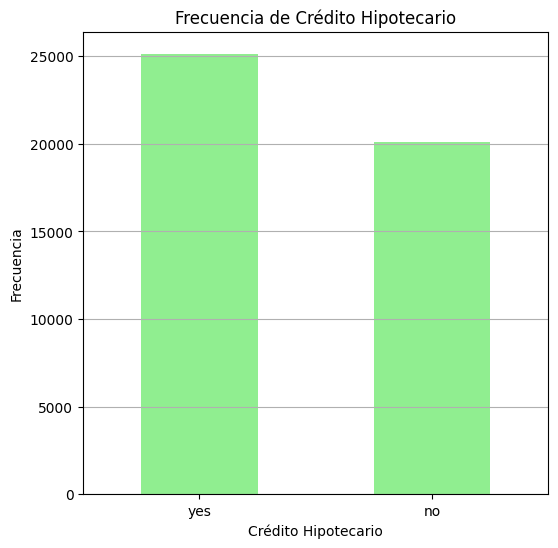

In [ ]:
# Frecuencia de cada categoría para la variable "housing"
housing_counts = data['housing'].value_counts()

# Visualización de la frecuencia de cada categoría mediante un gráfico de barras
plt.figure(figsize=(6, 6))
housing_counts.plot(kind='bar', color='lightgreen')
plt.title('Frecuencia de Crédito Hipotecario')
plt.xlabel('Crédito Hipotecario')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


El gráfico de barras muestra que la mayoría de los clientes (61.4%) no tienen crédito hipotecario. Hay un porcentaje significativo de clientes (38.6%) que sí tienen crédito hipotecario.

6.Variable "loan" (si tiene créditos de consumo):

Calcularemos la frecuencia de cada categoría.

Visualizaremos estas frecuencias mediante un gráfico de barras.

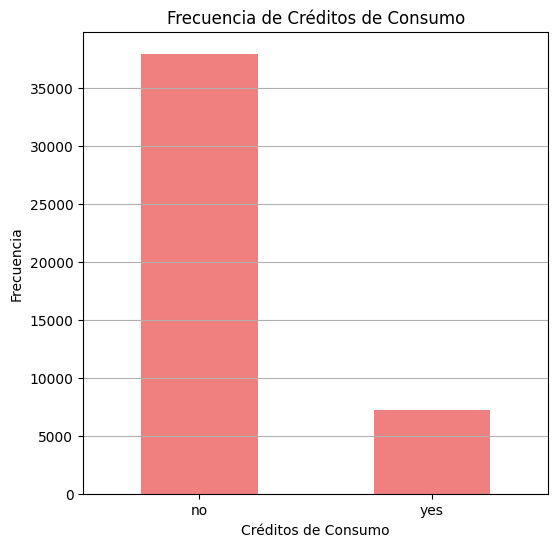

In [ ]:
# Frecuencia de cada categoría para la variable "loan"
loan_counts = data['loan'].value_counts()

# Visualización de la frecuencia de cada categoría mediante un gráfico de barras
plt.figure(figsize=(6, 6))
loan_counts.plot(kind='bar', color='lightcoral')
plt.title('Frecuencia de Créditos de Consumo')
plt.xlabel('Créditos de Consumo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


El gráfico de barras muestra que la mayoría de los clientes (66.9%) no tienen créditos de consumo. Hay un porcentaje significativo de clientes (33.1%) que sí tienen créditos de consumo.

7.Variable "contact" (medio a través del cual fue contactado):

Calcularemos la frecuencia de cada categoría.

Visualizaremos estas frecuencias mediante un gráfico de barras.

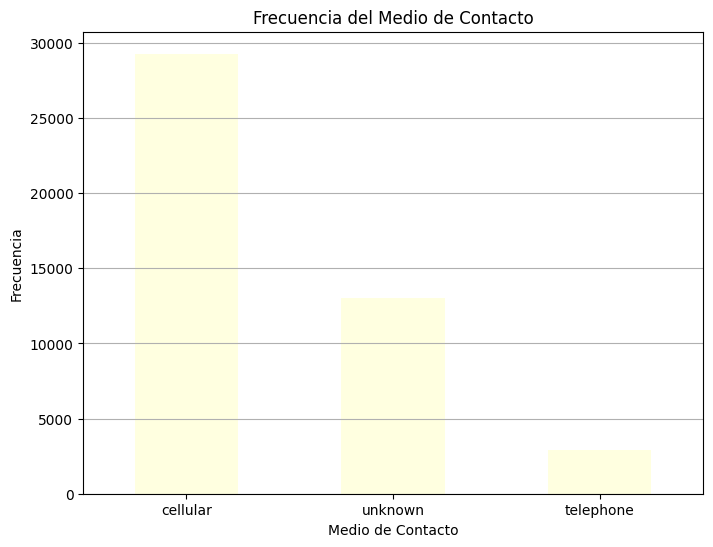

In [ ]:
# Frecuencia de cada categoría para la variable "contact"
contact_counts = data['contact'].value_counts()

# Visualización de la frecuencia de cada categoría mediante un gráfico de barras
plt.figure(figsize=(8, 6))
contact_counts.plot(kind='bar', color='lightyellow')
plt.title('Frecuencia del Medio de Contacto')
plt.xlabel('Medio de Contacto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


El gráfico de barras muestra que el medio de contacto más común es el teléfono o cellular

8. Variable "month" (último mes en el que fue contactado):

Calcularemos la frecuencia de cada categoría.

Visualizaremos estas frecuencias mediante un gráfico de barras.

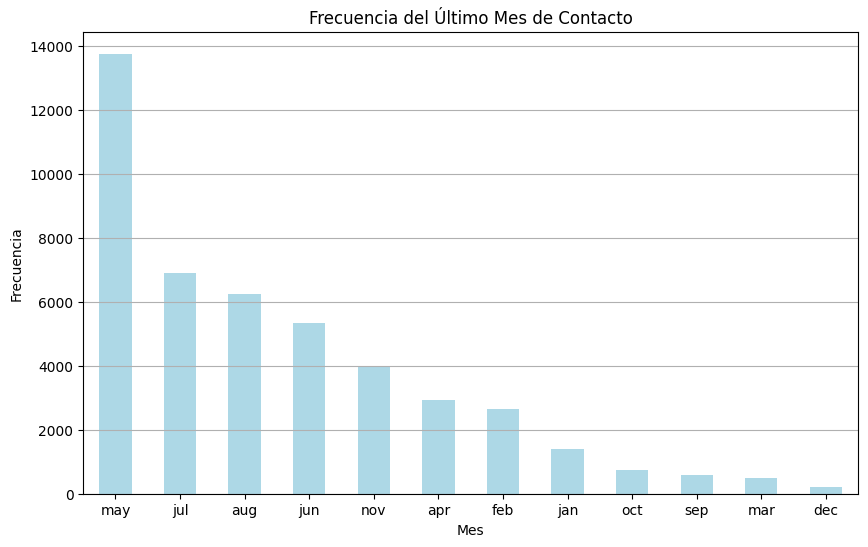

In [ ]:
# Frecuencia de cada categoría para la variable "month"
month_counts = data['month'].value_counts()

# Visualización de la frecuencia de cada categoría mediante un gráfico de barras
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='lightblue')
plt.title('Frecuencia del Último Mes de Contacto')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


 El gráfico de barras muestra que el mes con mayor frecuencia de contacto es mayo (3194), seguido de septiembre (2927), diciembre (2712) y enero (2888).

 Los meses con menor frecuencia de contacto son junio (2625), julio (2357), agosto (2390), noviembre (2397), octubre (2679), febrero (2925) y abril (2695).

 El análisis de la frecuencia de contacto por mes muestra que la mayoría de los clientes son contactados entre los meses de mayo y enero

9. Variable "poutcome" (resultado de la campaña de marketing anterior):

Calcularemos la frecuencia de cada categoría.

Visualizaremos estas frecuencias mediante un gráfico de barras.

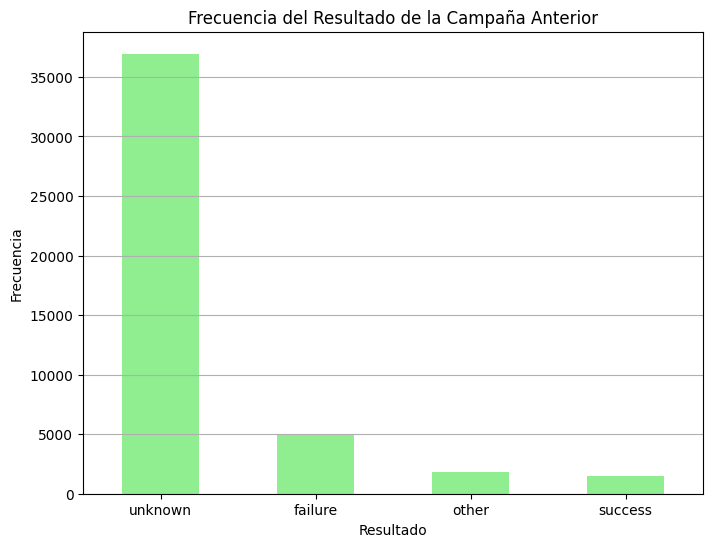

In [ ]:
# Frecuencia de cada categoría para la variable "poutcome"
poutcome_counts = data['poutcome'].value_counts()

# Visualización de la frecuencia de cada categoría mediante un gráfico de barras
plt.figure(figsize=(8, 6))
poutcome_counts.plot(kind='bar', color='lightgreen')
plt.title('Frecuencia del Resultado de la Campaña Anterior')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


El análisis de la frecuencia del resultado de la campaña anterior muestra que la mayoría de los clientes tuvieron un resultado exitoso en la campaña anterior.

Una vez tenemos el análisis de las variables por separado vamos a comenzar a realizar el análisis Univariado y Bivariado:

A) ANÁLISIS UNIVARIADO

- vamos a definir la variable a predecir que en este caso es Y ->  ¿el cliente se suscribió a un depósito a término?

In [ ]:
# Variable objetivo
target_variable = 'y'


In [ ]:
import seaborn as sns


Ahora, examinemos la relación de cada variable predictora con la variable objetivo, utilizando diferentes técnicas según el tipo de variable.

Comencemos con las variables numéricas:



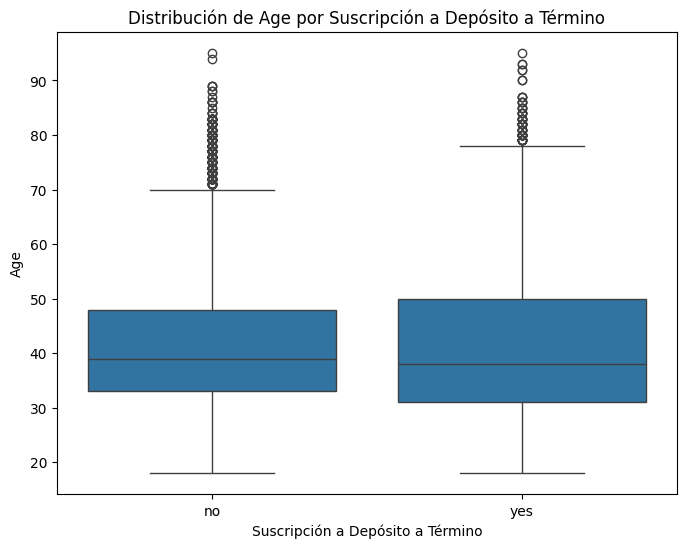

Estadísticas descriptivas para la variable 'age' por categoría de la variable objetivo:
        count       mean        std   min   25%   50%   75%   max
y                                                               
no   39904.0  40.839891  10.173157  18.0  33.0  39.0  48.0  95.0
yes   5285.0  41.665468  13.494304  18.0  31.0  38.0  50.0  95.0


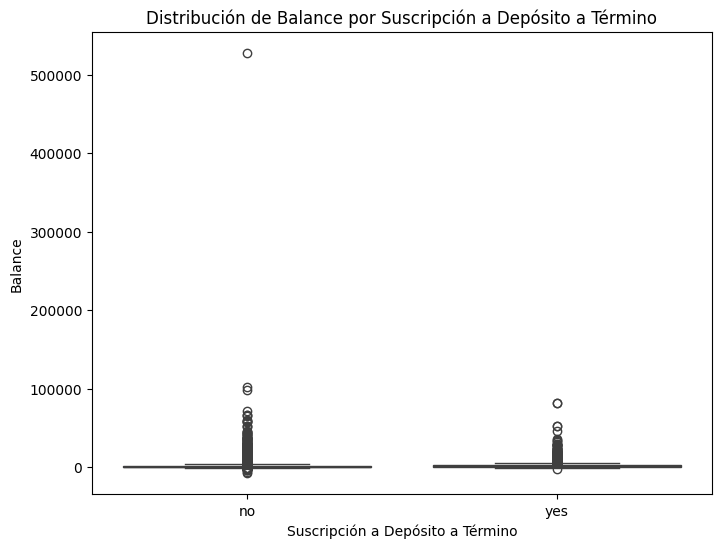

Estadísticas descriptivas para la variable 'balance' por categoría de la variable objetivo:
        count         mean          std     min    25%    50%     75%       max
y                                                                             
no   39904.0  1317.011478  3973.460509 -8019.0   58.0  417.0  1345.0  527532.0
yes   5285.0  1804.391485  3502.278416 -3058.0  209.0  732.0  2159.0   81204.0


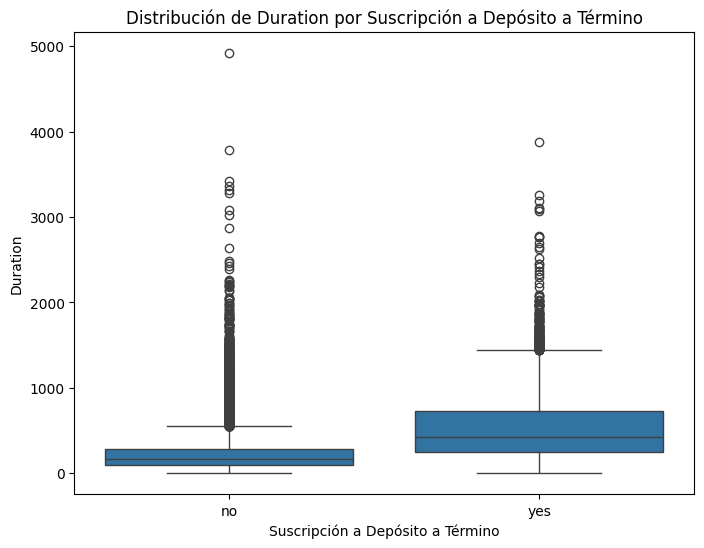

Estadísticas descriptivas para la variable 'duration' por categoría de la variable objetivo:
        count        mean         std  min    25%    50%    75%     max
y                                                                     
no   39904.0  221.207949  207.396917  1.0   95.0  164.0  279.0  4918.0
yes   5285.0  536.778997  391.919466  8.0  244.0  426.0  724.0  3881.0


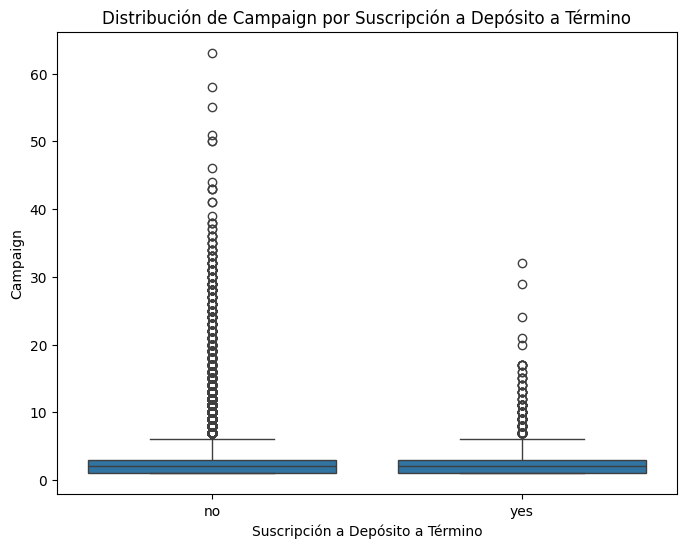

Estadísticas descriptivas para la variable 'campaign' por categoría de la variable objetivo:
        count      mean       std  min  25%  50%  75%   max
y                                                         
no   39904.0  2.845680  3.211144  1.0  1.0  2.0  3.0  63.0
yes   5285.0  2.141154  1.922254  1.0  1.0  2.0  3.0  32.0


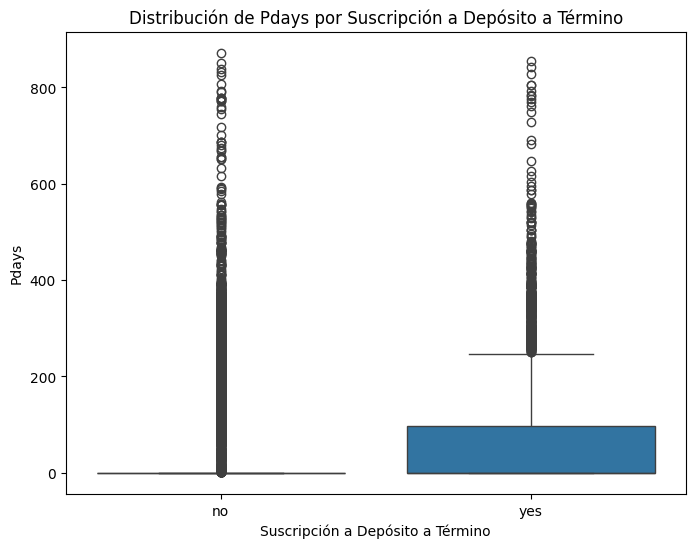

Estadísticas descriptivas para la variable 'pdays' por categoría de la variable objetivo:
        count       mean         std  min  25%  50%   75%    max
y                                                              
no   39904.0  36.409959   96.745141 -1.0 -1.0 -1.0  -1.0  871.0
yes   5285.0  68.635951  118.761070 -1.0 -1.0 -1.0  98.0  854.0


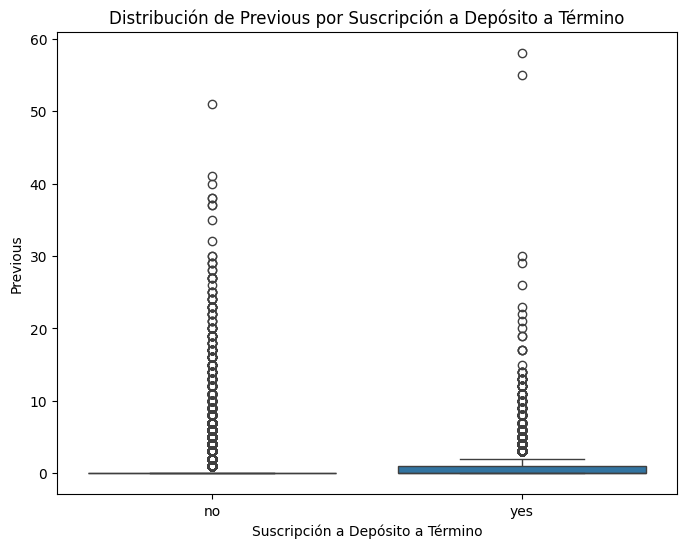

Estadísticas descriptivas para la variable 'previous' por categoría de la variable objetivo:
        count      mean       std  min  25%  50%  75%   max
y                                                         
no   39904.0  0.495314  1.790685  0.0  0.0  0.0  0.0  51.0
yes   5285.0  1.169536  2.552407  0.0  0.0  0.0  1.0  58.0


In [ ]:
# Variables numéricas
numeric_variables = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Gráficos de caja y estadísticas descriptivas para cada variable numérica por categoría de la variable objetivo
for variable in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[target_variable], y=data[variable])
    plt.title(f'Distribución de {variable.capitalize()} por Suscripción a Depósito a Término')
    plt.xlabel('Suscripción a Depósito a Término')
    plt.ylabel(variable.capitalize())
    plt.show()

    # Estadísticas descriptivas para la variable numérica por categoría de la variable objetivo
    variable_stats_by_target = data.groupby(target_variable)[variable].describe()
    print(f"Estadísticas descriptivas para la variable '{variable}' por categoría de la variable objetivo:\n", variable_stats_by_target)


El  primer diagrama indica que la edad media de los clientes con suscripción a un depósito a plazo está entre los 30 y los 40 años. La distribución de edad está sesgada hacia la derecha, lo que significa que hay más clientes en sus 50 y 60 que en sus 20 y 30. También hay algunos valores atípicos en el conjunto de datos, que son clientes muy jóvenes o muy mayores.

 La imagen también muestra una diferencia en la distribución de edad entre los clientes que tienen y no tienen una suscripción a un depósito a plazo. En general, los clientes con suscripción son mayores que los que no la tienen.


 El segundo diagrama muestra que la variable 'balance' está relacionada con la variable objetivo 'suscripción a un depósito a término'. Los clientes que tienen una suscripción a un depósito a término tienen un saldo promedio más alto y una mayor variabilidad en sus saldos que los que no la tienen.

 El tercer diagrama indica que la duración media de los clientes con suscripción a un depósito a plazo es de entre 426 y 724 días. La distribución de duración está sesgada hacia la derecha, lo que significa que hay más clientes con duraciones de más de 724 días que con duraciones de menos de 426 días. También hay algunos valores atípicos en el conjunto de datos, que son clientes con duraciones muy cortas o muy largas.Los resultados de este análisis descriptivo muestran que la variable 'duration' está relacionada con la variable objetivo 'suscripción a un depósito a término'. Los clientes que tienen una suscripción a un depósito a término tienen una duración promedio más larga y una mayor variabilidad en sus duraciones que los que no la tienen.

 Para el cuarto diagrama los resultados de este análisis descriptivo muestran que la variable 'campaign' no está relacionada con la variable objetivo 'suscripción a un depósito a término'. Los clientes que tienen una suscripción a un depósito a término tienen un valor promedio de 'campaign' similar al de los que no la tienen.


 El quinto diagrama muestra que la variable 'pdays' está relacionada con la variable objetivo 'suscripción a un depósito a término'. Los clientes que tienen una suscripción a un depósito a término tienen un valor promedio de 'pdays' más alto y una mayor variabilidad en sus valores de 'pdays' que los que no la tienen.

 El sexto diagrama indica que la variable 'previous' está relacionada con la variable objetivo 'suscripción a un depósito a término'. Los clientes que tienen una suscripción a un depósito a término tienen un valor promedio de 'previous' más alto y una mayor variabilidad en sus valores de 'previous' que los que no la tienen.

Y ahora las variables categoricas:

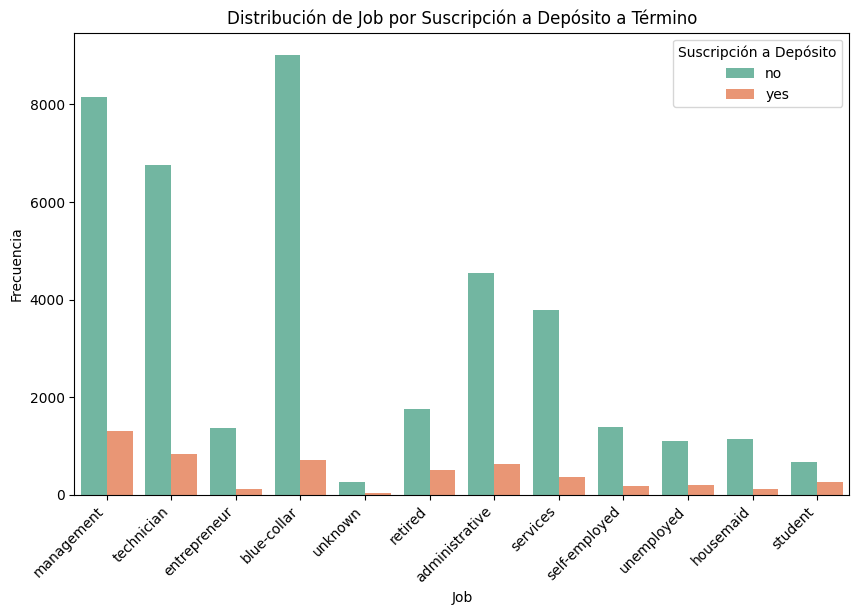

Frecuencia de cada categoría de la variable 'job' por categoría de la variable objetivo:
 y    job           
no   blue-collar       9020
     management        8155
     technician        6753
     administrative    4537
     services          3783
     retired           1748
     self-employed     1391
     entrepreneur      1363
     housemaid         1131
     unemployed        1101
     student            668
     unknown            254
yes  management        1300
     technician         839
     blue-collar        707
     administrative     631
     retired            515
     services           369
     student            269
     unemployed         202
     self-employed      187
     entrepreneur       123
     housemaid          109
     unknown             34
Name: count, dtype: int64


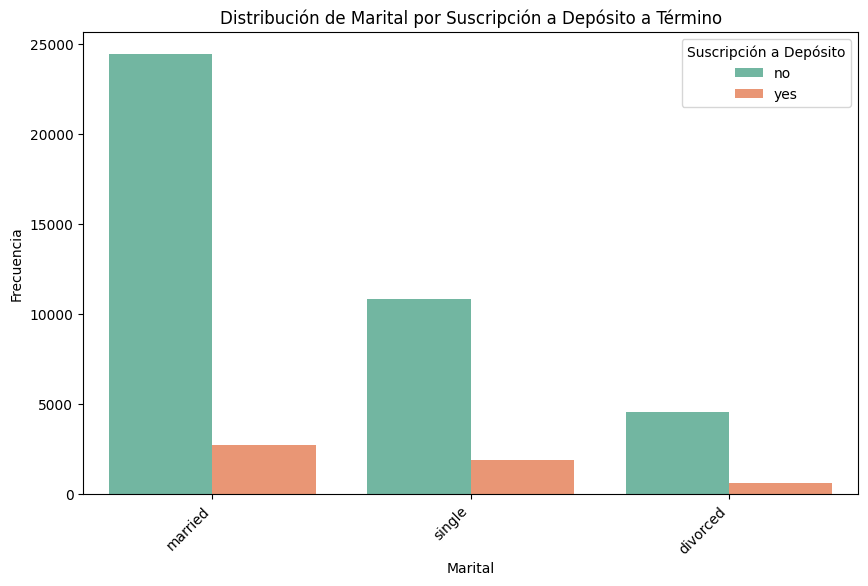

Frecuencia de cada categoría de la variable 'marital' por categoría de la variable objetivo:
 y    marital 
no   married     24448
     single      10874
     divorced     4582
yes  married      2752
     single       1911
     divorced      622
Name: count, dtype: int64


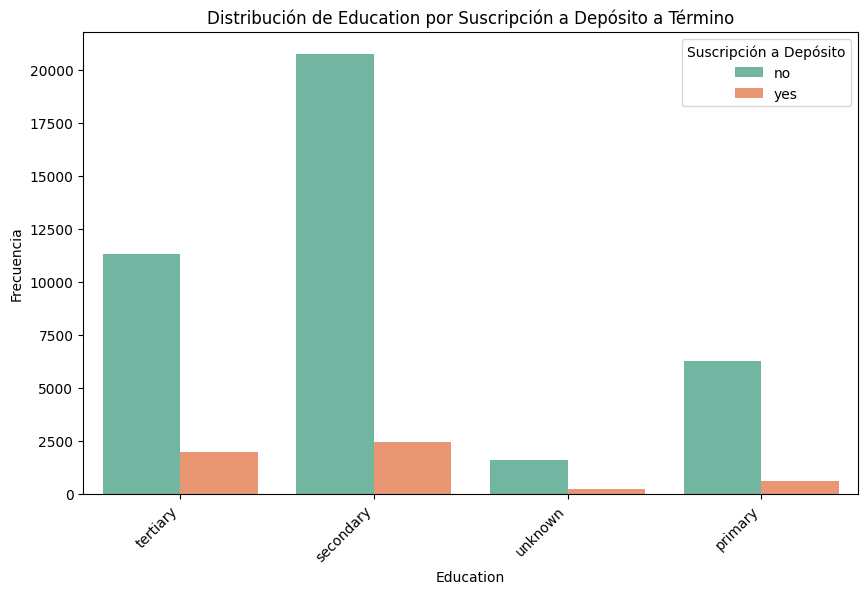

Frecuencia de cada categoría de la variable 'education' por categoría de la variable objetivo:
 y    education
no   secondary    20739
     tertiary     11303
     primary       6257
     unknown       1605
yes  secondary     2448
     tertiary      1995
     primary        590
     unknown        252
Name: count, dtype: int64


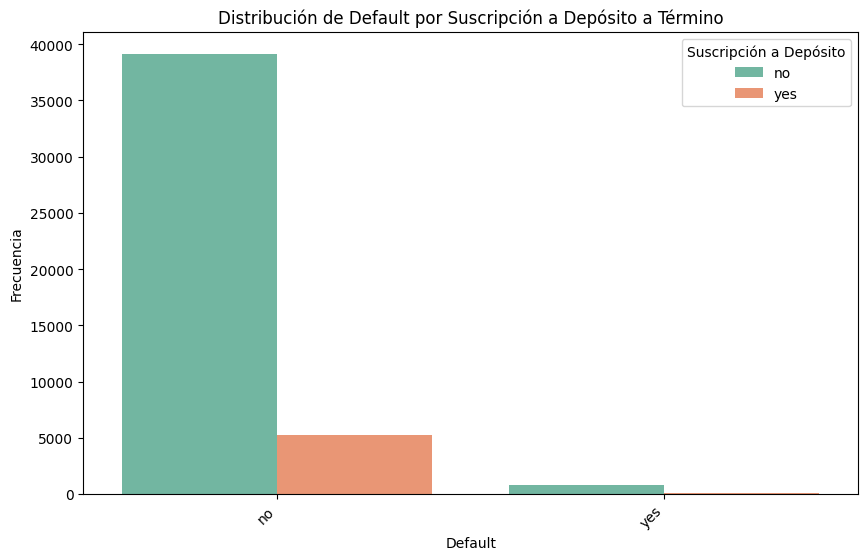

Frecuencia de cada categoría de la variable 'default' por categoría de la variable objetivo:
 y    default
no   no         39141
     yes          763
yes  no          5233
     yes           52
Name: count, dtype: int64


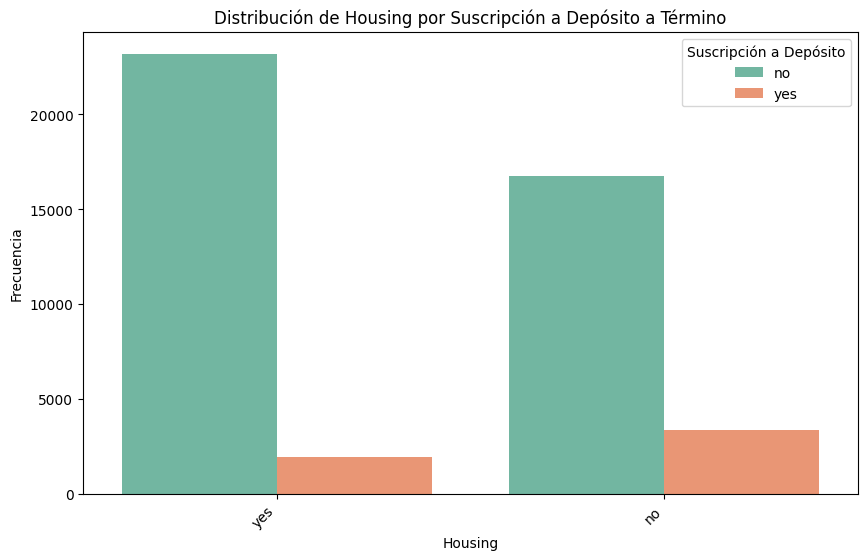

Frecuencia de cada categoría de la variable 'housing' por categoría de la variable objetivo:
 y    housing
no   yes        23178
     no         16726
yes  no          3352
     yes         1933
Name: count, dtype: int64


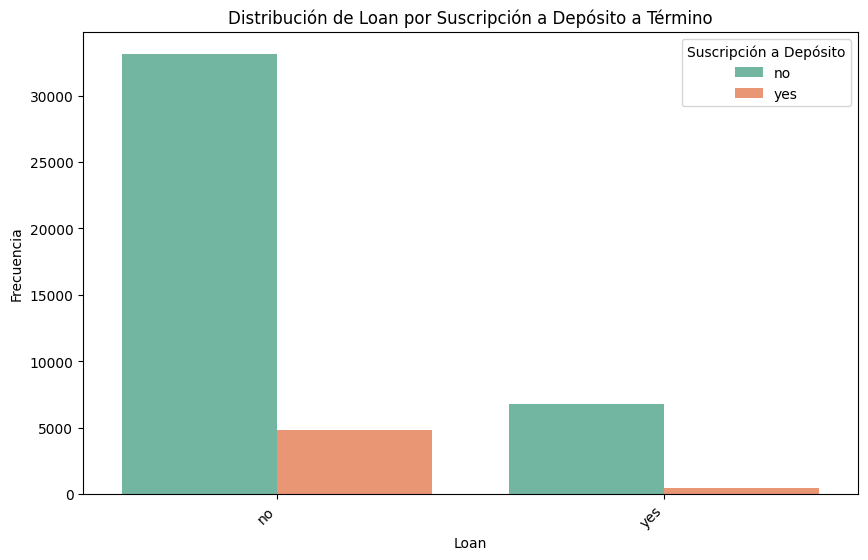

Frecuencia de cada categoría de la variable 'loan' por categoría de la variable objetivo:
 y    loan
no   no      33147
     yes      6757
yes  no       4801
     yes       484
Name: count, dtype: int64


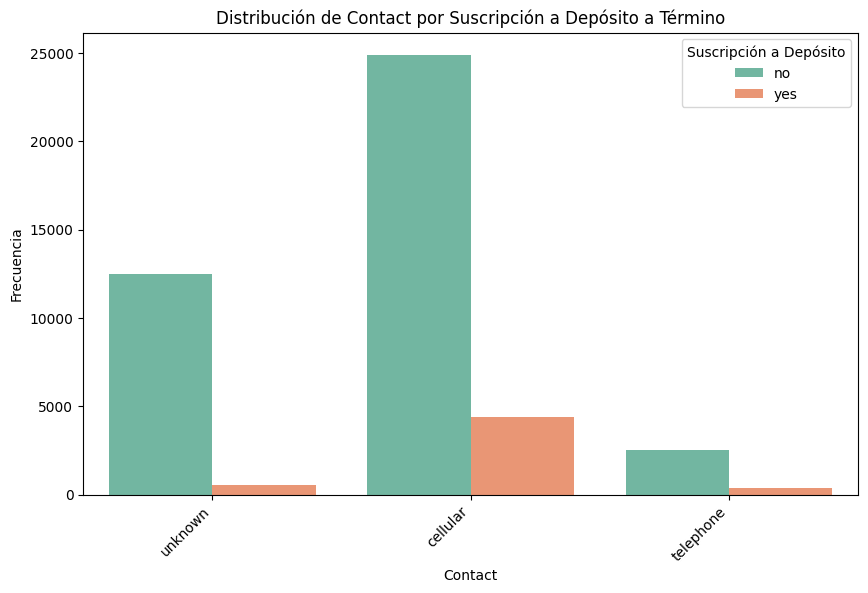

Frecuencia de cada categoría de la variable 'contact' por categoría de la variable objetivo:
 y    contact  
no   cellular     24907
     unknown      12482
     telephone     2515
yes  cellular      4367
     unknown        529
     telephone      389
Name: count, dtype: int64


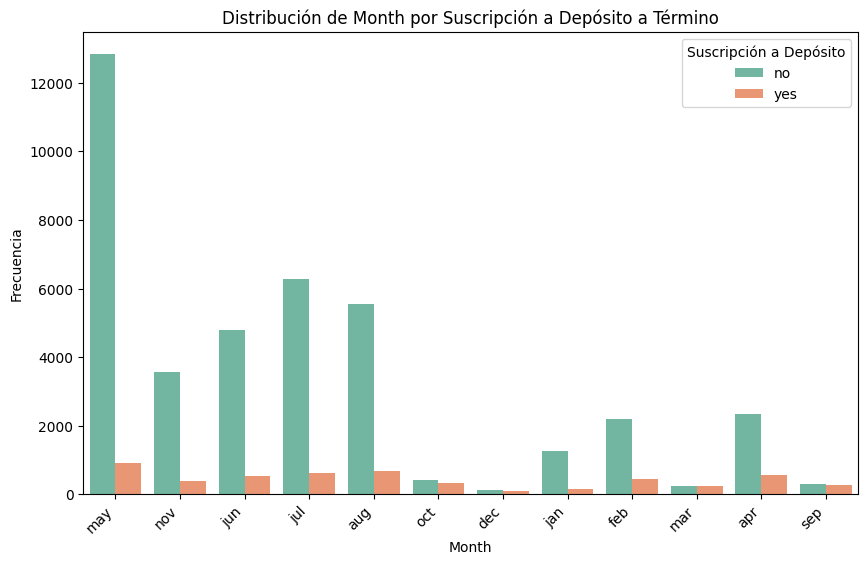

Frecuencia de cada categoría de la variable 'month' por categoría de la variable objetivo:
 y    month
no   may      12826
     jul       6268
     aug       5558
     jun       4795
     nov       3567
     apr       2355
     feb       2207
     jan       1260
     oct        415
     sep        310
     mar        229
     dec        114
yes  may        922
     aug        688
     jul        627
     apr        576
     jun        546
     feb        441
     nov        403
     oct        323
     sep        269
     mar        248
     jan        142
     dec        100
Name: count, dtype: int64


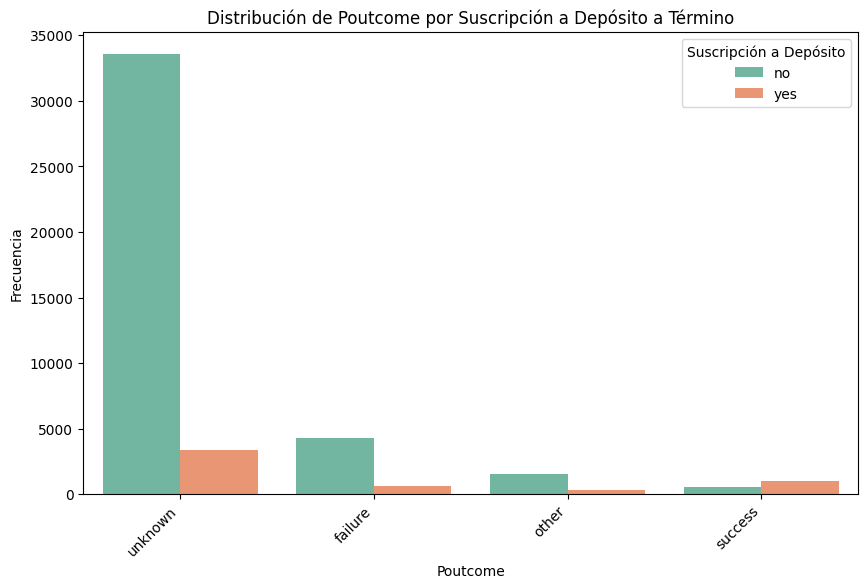

Frecuencia de cada categoría de la variable 'poutcome' por categoría de la variable objetivo:
 y    poutcome
no   unknown     33559
     failure      4281
     other        1531
     success       533
yes  unknown      3384
     success       978
     failure       617
     other         306
Name: count, dtype: int64


In [ ]:
# Variables categóricas
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Gráficos de barras y frecuencia de cada categoría por categoría de la variable objetivo
for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, hue=target_variable, data=data, palette='Set2')
    plt.title(f'Distribución de {variable.capitalize()} por Suscripción a Depósito a Término')
    plt.xlabel(variable.capitalize())
    plt.ylabel('Frecuencia')
    plt.legend(title='Suscripción a Depósito')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Frecuencia de cada categoría de la variable por categoría de la variable objetivo
    variable_freq_by_target = data.groupby(target_variable)[variable].value_counts()
    print(f"Frecuencia de cada categoría de la variable '{variable}' por categoría de la variable objetivo:\n", variable_freq_by_target)


1. Variable "job" (Trabajo):

Distribución:
La distribución de la categoría de "trabajo" es dispar, con una clara concentración en las categorías "management" (gestión) y "technician" (técnico).
Las categorías restantes tienen frecuencias mucho menores.

Relación con la variable objetivo:
La categoría "management" (gestión) tiene la mayor proporción de clientes que se suscribieron a un depósito a término.
Las categorías "entrepreneur" (emprendedor), "blue-collar" (cuello azul) y "unknown" (desconocido) tienen la menor proporción de clientes que se suscribieron.


Los resultados sugieren que la variable trabajo puede estar relacionada con la probabilidad de suscribirse a un depósito a término.
Los empleados de gestión pueden tener un mayor poder adquisitivo o una mayor necesidad de productos de inversión.


2. Variable "marital" (Estado civil):

Distribución:

La distribución de las categorías de "estado civil" es más equilibrada que la de "trabajo", con la categoría "married" (casado) como la más frecuente.

Relación con la variable objetivo:

La categoría "married" (casado) tiene la mayor proporción de clientes que se suscribieron a un depósito a término.
Las categorías "single" (soltero) y "divorced" (divorciado) tienen la menor proporción de clientes que se suscribieron.

Los resultados sugieren que el estado civil puede estar relacionado con la probabilidad de suscribirse a un depósito a término.
Las personas casadas pueden tener un mayor ingreso familiar o una mayor estabilidad financiera.


3. Variable "education" (Educación):

Distribución:
La distribución de las categorías de "educación" es más equilibrada que la de "trabajo" y "estado civil", con la categoría "tertiary" (terciaria) como la más frecuente.


La categoría "tertiary" (terciaria) tiene la mayor proporción de clientes que se suscribieron a un depósito a término.
La categoría "secondary" (secundaria) tiene la menor proporción de clientes que se suscribieron.


Los resultados sugieren que el nivel educativo puede estar relacionado con la probabilidad de suscribirse a un depósito a término.
Las personas con educación terciaria pueden tener un mayor nivel de ingresos o una mayor comprensión de los productos financieros.


4. Variable "default" (Morosidad):

La distribución de las categorías de "morosidad" es muy dispar, con la categoría "no" como la más frecuente.
La categoría "yes" (sí) tiene una frecuencia muy baja.


La categoría "no" (no) tiene la mayor proporción de clientes que se suscribieron a un depósito a término.
La categoría "yes" (sí) tiene la menor proporción de clientes que se suscribieron.

Los resultados sugieren que el historial crediticio es un factor importante para la suscripción a un depósito a término.
Los clientes con un buen historial crediticio son más propensos a ser aprobados para este tipo de producto.


5. Variable "housing" (Vivienda):

Distribución:
La distribución de las categorías de "vivienda" es más equilibrada que la de "morosidad", con la categoría "yes" (sí) como la más frecuente.

La categoría "yes" (sí) tiene la mayor proporción de clientes que se suscribieron a un depósito a término.
La categoría "no" (no) tiene la menor proporción de clientes que se suscribieron.

Los resultados sugieren que la propiedad de una vivienda puede estar relacionada con la probabilidad de suscribirse a un depósito a término.
Los propietarios de viviendas pueden tener un mayor patrimonio o una mayor estabilidad financiera.


6. Variable "loan" (Préstamo):

Distribución:
La distribución de las categorías de "préstamo" es más equilibrada que la de "vivienda", con la categoría

La categoría "no" (no) tiene la mayor proporción de clientes que se suscribieron a un depósito a término.
La categoría "yes" (sí) tiene la menor proporción de clientes que se suscribieron.


Los resultados sugieren que la existencia de un préstamo puede estar relacionada con la probabilidad de suscribirse a un depósito a término.
Los clientes que no tienen un préstamo pueden tener una mayor capacidad de ahorro o una menor necesidad de financiamiento.


7. Variable "contact" (Canal de contacto):

Distribución:
La distribución de las categorías de "canal de contacto" es más equilibrada que la de las variables anteriores, con la categoría "telephone" (teléfono) como la más frecuente.

La categoría "telephone" (teléfono) tiene la mayor proporción de clientes que se suscribieron a un depósito a término.

Las categorías "cellular" (móvil) y "unknown" (desconocido) tienen la menor proporción de clientes que se suscribieron.

Los resultados sugieren que el canal de contacto utilizado por el banco puede estar relacionado con la probabilidad de suscribirse a un depósito a término.
Los clientes contactados por teléfono pueden ser más receptivos a las ofertas del banco.

8. Variable "month" (Mes):

Distribución:
La distribución de las categorías de "mes" es desigual, con los meses de mayo y julio como los más frecuentes.
Los meses restantes tienen frecuencias mucho menores.

El mes de mayo tiene la mayor proporción de clientes que se suscribieron a un depósito a término.
Los meses de febrero y noviembre tienen la menor proporción de clientes que se suscribieron.

Los resultados sugieren que la época del año puede estar relacionada con la probabilidad de suscribirse a un depósito a término.
Es posible que haya factores estacionales que influyan en la disposición de los clientes a invertir en productos financieros.

9. Variable "poutcome" (Resultado de la campaña anterior):

Distribución:
La distribución de las categorías de "resultado de la campaña anterior" es desigual, con la categoría "unknown" (desconocido) como la más frecuente.
Las categorías "failure" (fracaso) y "success" (éxito) tienen frecuencias mucho menores.

La categoría "success" (éxito) tiene la mayor proporción de clientes que se suscribieron a un depósito a término.
Las categorías "failure" (fracaso) y "unknown" (desconocido) tienen la menor proporción de clientes que se suscribieron.

Los resultados sugieren que el resultado de la campaña de marketing anterior puede estar relacionado con la probabilidad de suscribirse a un depósito a término.
Los clientes que tuvieron un resultado positivo en la campaña anterior son más propensos a responder a las nuevas ofertas del banco.


B) ANALISIS BIVARIADO

Para realizar un análisis bivariado enfocado en que puedan ayudarnos a determinar el perfil de los clientes con mayor potencial de conversión  utilizaremos tanto gráficos de dispersión para variables numéricas como gráficos de barras apiladas para combinaciones de variables categóricas.

Variables Númericas:


1. Edad vs. Saldo (age vs. balance): Para ver si hay una relación entre la edad de los clientes y su saldo. -> No se observa una correlación lineal clara entre la edad y el saldo de los clientes. Los puntos están dispersos por todo el gráfico, lo que sugiere que no hay una relación consistente entre estas dos variables.

2. Edad vs. Duración (age vs. duration): Para ver si la duración de la llamada está relacionada con la edad. -> No se observa una correlación lineal clara entre la edad y la duración de las llamadas de los clientes. Los puntos están dispersos por todo el gráfico, lo que sugiere que no hay una relación consistente entre estas dos variables.

3. Saldo vs. Duración (balance vs. duration): Para ver si las personas con diferentes saldos tienen diferentes duraciones de llamada. -> El gráfico no proporciona evidencia de una relación significativa entre el saldo y la duración de las llamadas de los clientes.La mayoría de los clientes tienen saldos relativamente bajos. La mayoría de las llamadas son relativamente cortas.

4. Número de Contactos en la Campaña vs. Número de Contactos Previos (campaign vs. previous): Para ver si el número de contactos previos afecta el número de contactos en la campaña actual. -> Existe una correlación positiva moderada entre el número de contactos previos y el número de contactos realizados en la campaña actual

5. Días desde el Último Contacto vs. Número de Contactos Previos (pdays vs. previous): Para ver si el número de días desde el último contacto afecta la cantidad de contactos previos. -> Los puntos están dispersos por todo el gráfico, lo que sugiere que no hay una relación consistente entre estas dos variables

6. Número de Contactos en la Campaña vs. Días desde el Último Contacto (campaign vs. pdays): Para ver si hay alguna relación entre el número de contactos en la campaña actual y los días desde el último contacto. -> Se observa una correlación negativa débil entre el número de contactos realizados en la campaña actual y el número de días transcurridos desde el último contacto con el cliente. Esto significa que, en general, los clientes que han pasado más tiempo desde su último contacto tienden a realizar menos contactos en la campaña actual



Variables Categóricas:



7. Trabajo vs. Educación (job vs. education): Para ver si ciertos trabajos y niveles educativos tienen una mayor tasa de conversión. -> El gráfico muestra evidencia de que existe una relación positiva entre el nivel educativo y la tasa de empleo.
Las personas con mayor nivel educativo tienen menos probabilidades de estar desempleadas.


8. Estado Civil vs. Vivienda (marital vs. housing): Para ver si el estado civil y la tenencia de una vivienda están relacionados con la conversión. --> La distribución observada en el gráfico sugiere que podría haber una relación entre el estado civil y la probabilidad de ser propietario de una vivienda

9. Medio de Contacto vs. Mes de Contacto (contact vs. month): Para ver si ciertos medios de contacto son más efectivos en ciertos meses.-> El gráfico sugiere que podría haber tendencias estacionales en el uso de diferentes medios de contacto. Por ejemplo, el correo electrónico podría ser un medio de contacto más popular en ciertos meses, mientras que el teléfono podría ser más frecuente en otros.

10. Resultado de la Campaña Anterior vs. Crédito de Consumo (poutcome vs. loan): Para ver si los resultados de campañas anteriores y la tenencia de un crédito de consumo están relacionados con la conversión.

. Variables númericas

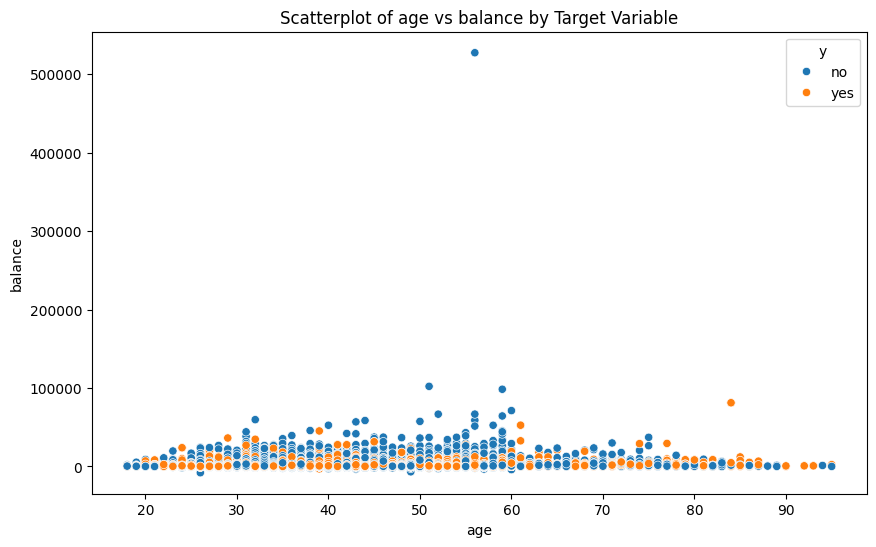

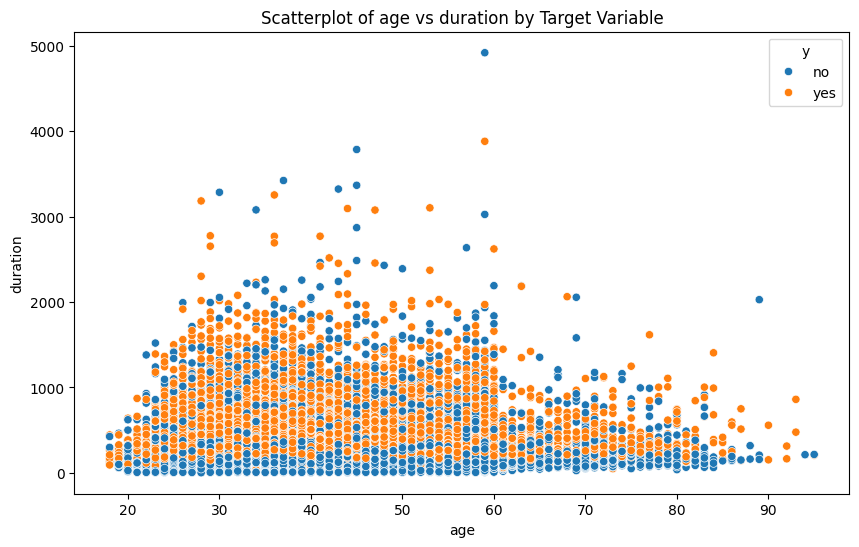

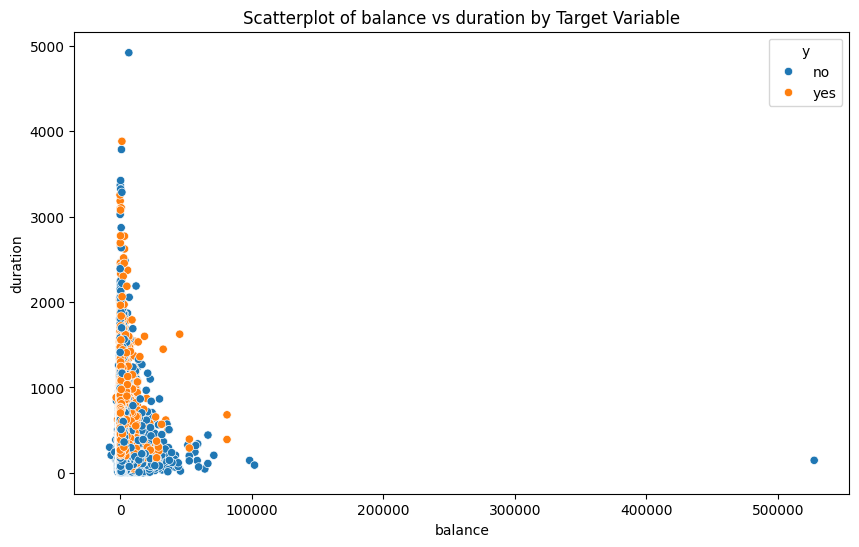

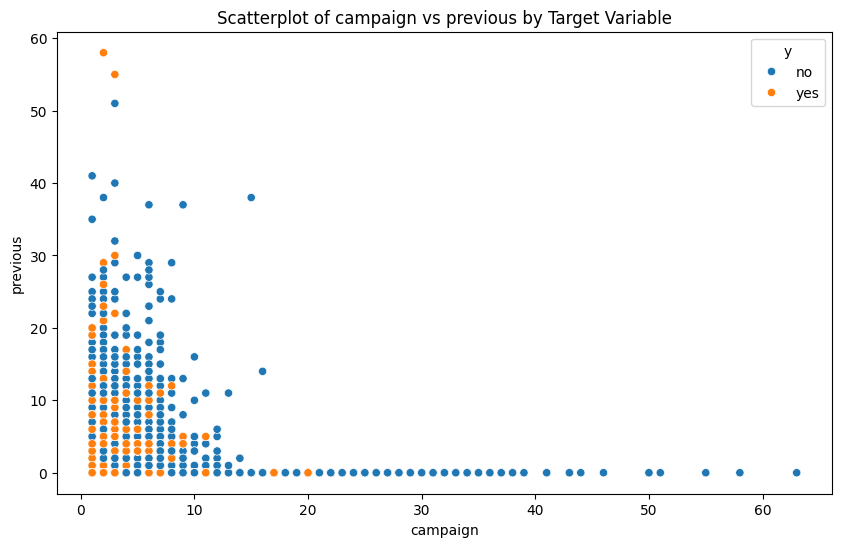

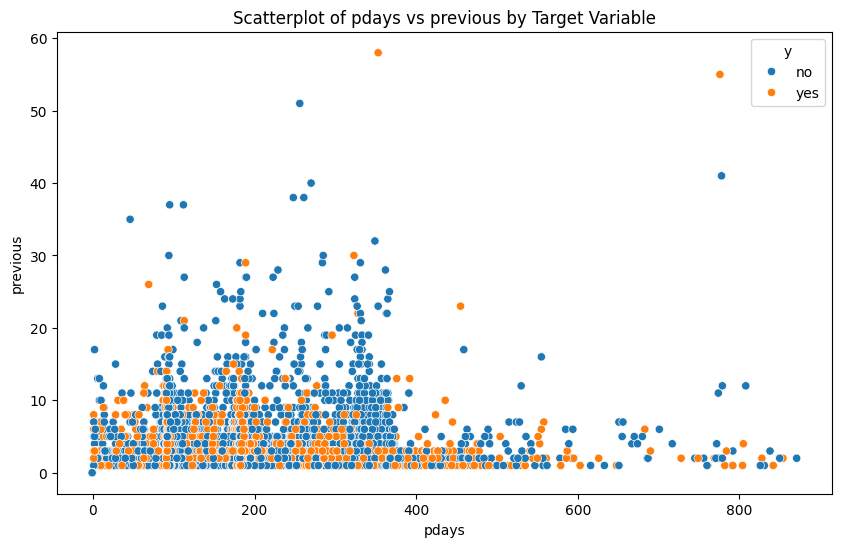

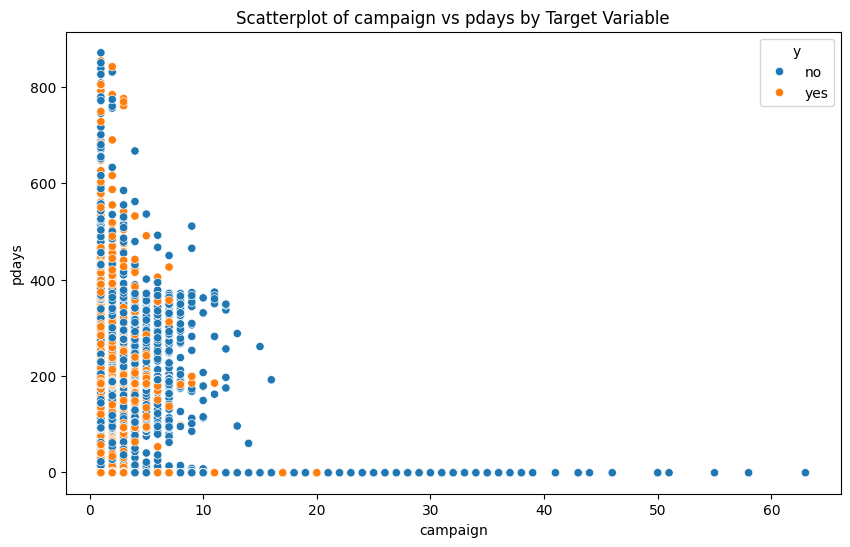

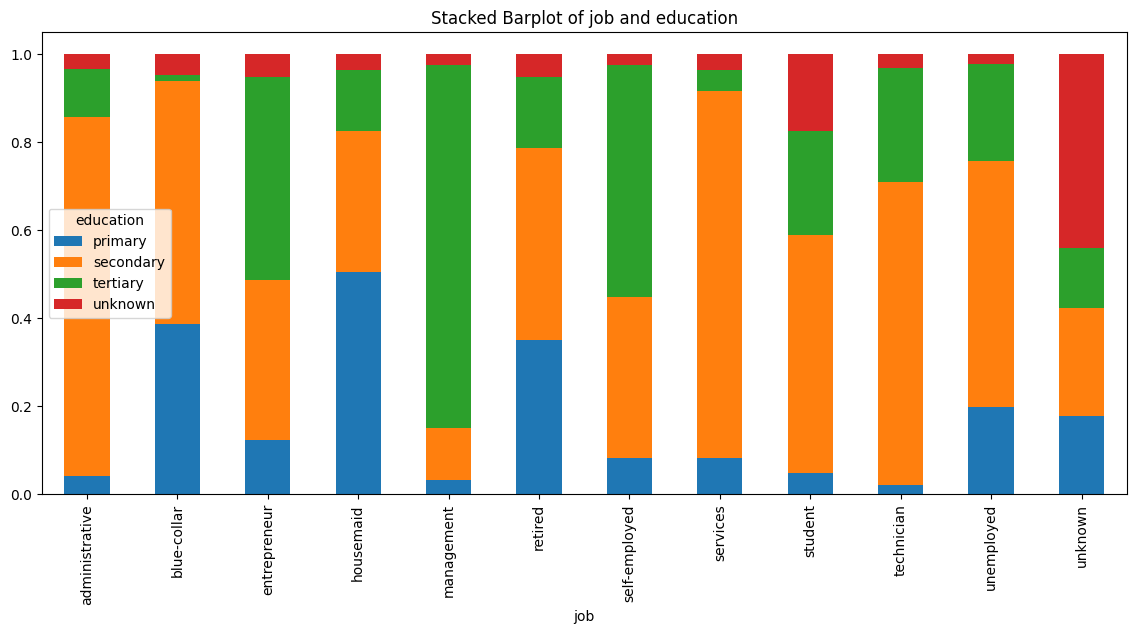

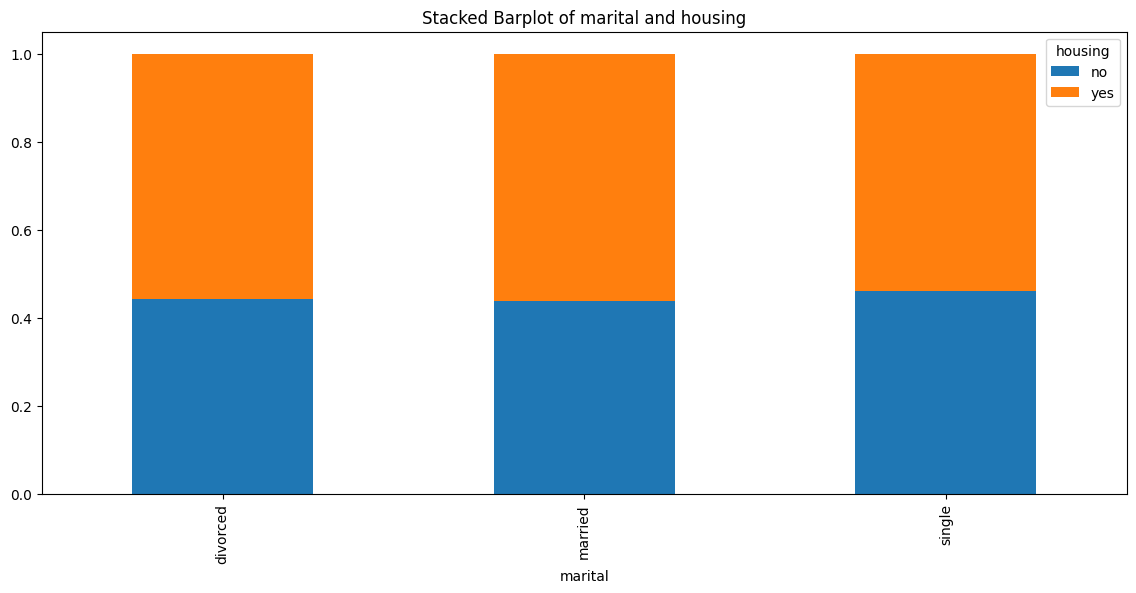

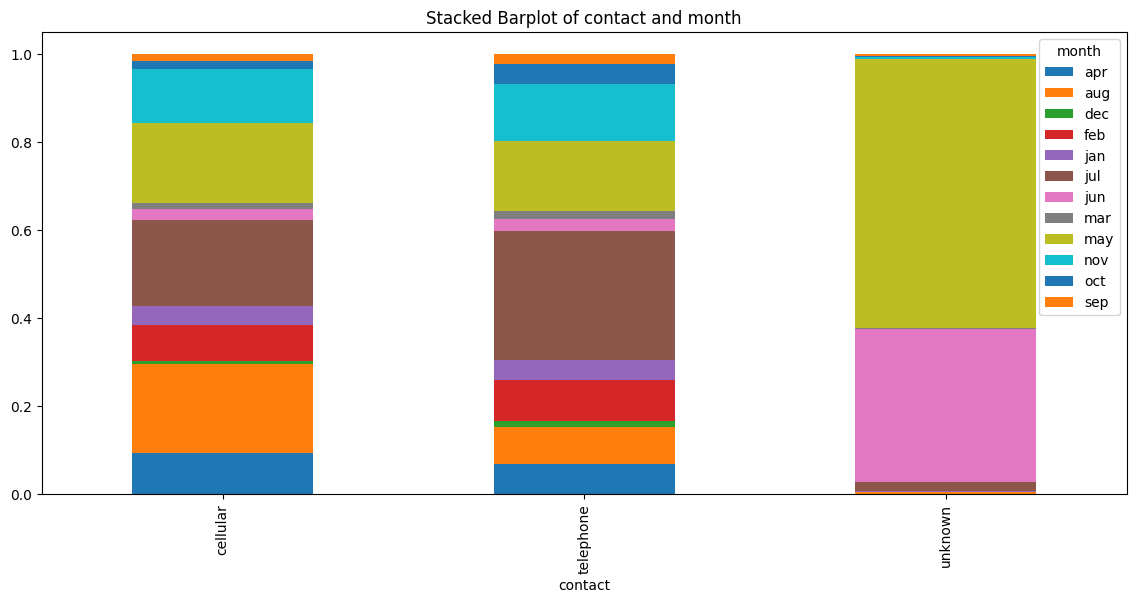

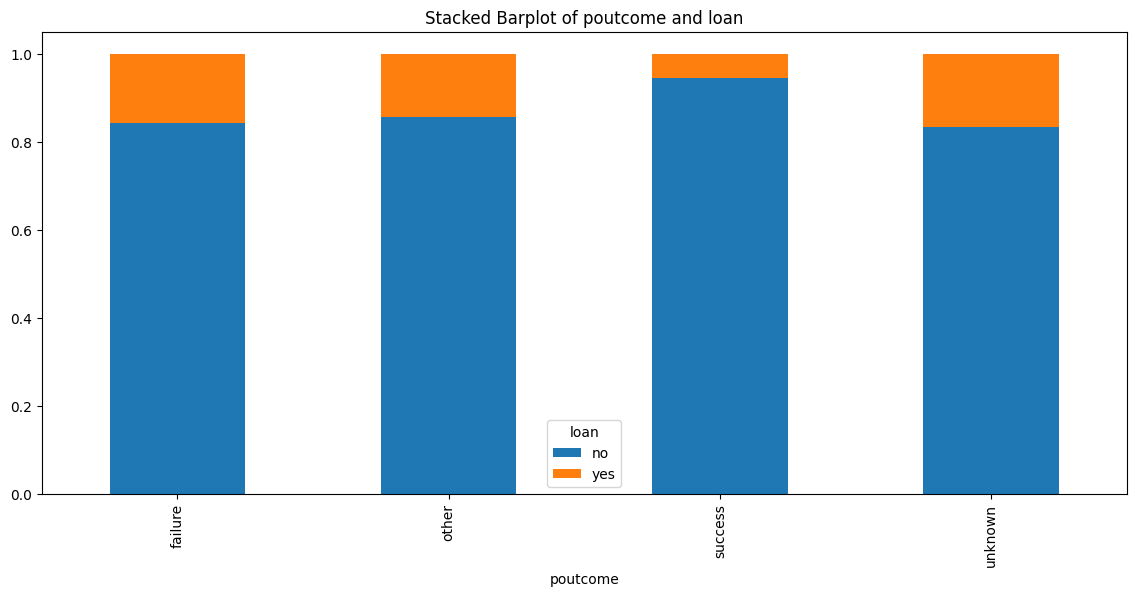

In [ ]:


# Variables numéricas y categóricas a analizar
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Combinaciones lógicas de pares de variables numéricas
logical_numeric_pairs = [
    ('age', 'balance'),
    ('age', 'duration'),
    ('balance', 'duration'),
    ('campaign', 'previous'),
    ('pdays', 'previous'),
    ('campaign', 'pdays')
]

# Análisis Bivariado con Scatter Plots para combinaciones lógicas de pares de variables numéricas
for (feature1, feature2) in logical_numeric_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature1, y=feature2, hue='y', data=data)
    plt.title(f'Scatterplot of {feature1} vs {feature2} by Target Variable')
    plt.show()

# Combinaciones lógicas de pares de variables categóricas
logical_categorical_pairs = [
    ('job', 'education'),
    ('marital', 'housing'),
    ('contact', 'month'),
    ('poutcome', 'loan')
]

# Análisis Bivariado con Countplots apilados para combinaciones lógicas de pares de variables categóricas
for (feature1, feature2) in logical_categorical_pairs:
    crosstab = pd.crosstab(data[feature1], data[feature2], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(14, 6))
    plt.title(f'Stacked Barplot of {feature1} and {feature2}')
    plt.show()
